# Project: Wrangling and Analyze Data

* [Data Gathering](#gathering)
* [Assessment](#assessment)
* [Cleaning](#gathering)
* [Storage](#storage)
* [Analysis](#analysis)

<a id = gathering></a>
## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [38]:
import numpy as np
import pandas as pd
import requests
import json
import tweepy
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

# Loading the twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Downloading the 'image_predictions.tsv' file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
reponse = requests.get(url)

filename = url.split('/')[-1]

with open(filename, 'wb') as file:
    file.write(reponse.content)
    
# Loading the predictions dataset
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


I had some issues with the API so I used the supplied file (tweet_json.txt) 

In [3]:
# Loading twitter json data from the file 
df_list = []
with open('tweet_json.txt') as f:
    for line in f.readlines():
        obj = json.loads(str(line))
        df_list.append({"tweet_id": obj["id"],
                        "retweet_count": obj["retweet_count"],
                        "favorite_count": obj["favorite_count"]
                       })
# Creating a dataframe to hold the gathered data
df_tweet_data = pd.DataFrame(df_list)
df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id = assessment ></a>
## Assessing Data


In [4]:
# Visual Assessment
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
227,848324959059550208,NaN,NaN,2017-04-02 00:03:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Odin. He's supposed to be giving directio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848324959...,12,10,Odin,None,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None


In [5]:
# Programmatic Assessment
df_archive.shape

(2356, 17)

In [6]:
# Checking datatypes
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# Checking for duplicates
sum(df_archive.duplicated())

0

In [8]:
# Visual Assessment 
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True
1218,743609206067040256,https://pbs.twimg.com/media/ClHUkhQWAAAy7Yj.jpg,3,Weimaraner,0.982794,True,American_Staffordshire_terrier,0.004766,True,Great_Dane,0.003432,True
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True


In [9]:
df_predictions.shape

(2075, 12)

In [10]:
# Checking for duplicates
sum(df_predictions.duplicated())

0

In [11]:
# Checking datatypes
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
#### Archive Dataframe
1. Missing data in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns.

2. Improper datatype for the `timestamp` column.

3. Some columns add no value to our analysis.

4. Some rows are retweets and should be removed from the dataset.

5. Abnormalities in the `name` column.

#### Predictions Dataframe
6. Not all predictions are breeds of dogs.

7. `jpg_url` and `img_num` columns are unnecessary for analysis.

8. Missing data across all the datasets.

### Tidiness issues
1. The type of dog should be represented in a single column and not four in the `archive` dataframe.
2. A specific breed of dog has to be determined for each prediction in the `predictions` dataframe.
3. The separation of data across multiple tables has to be addressed.

<a id = cleaning></a>
## Cleaning Data

In [12]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweet_data_clean = df_tweet_data.copy()

### Issue #1:

#### Define
Improper datatype for the `timestamp` column. The datatype should be changed to a datetime object.

#### Code

In [13]:
df_archive_clean.timestamp = df_archive_clean.timestamp.astype('datetime64')

#### Test

In [14]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue 2:

#### Define
The `source` and `expanded_urls` columns add no value to our analysis and so I'd be dropping them.

#### Code

In [15]:
df_archive_clean.drop(columns = ["source", "expanded_urls"], inplace = True)

#### Test

In [16]:
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None


### Issue 3:

#### Define
Missing data in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns, indicate that some of the tweets are not original ratings rather they are retweets and replies.

#### Code

In [17]:
# Isolating the rows that are actual ratings
not_retweets = df_archive_clean.retweeted_status_id.isna()
not_replies = df_archive_clean.in_reply_to_status_id.isna()
df_archive_clean = df_archive_clean[not_retweets]
df_archive_clean = df_archive_clean[not_replies]

# the columns are now empty and should be deleted
df_archive_clean.drop(columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace = True)

C:\Users\user\Anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


#### Test

In [18]:
print(df_archive_clean.shape)
df_archive_clean.head(1)

(2097, 10)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


### Issue 4:

#### Define
Not all pets have names. We'll need a standard way to address them. I choose `"None"` to represent the nameless pets as it is the majority.

In [19]:
def nameless(x):
    if x == "a":
        return "None"
    else:
        return x

df_archive_clean.name = df_archive_clean.name.apply(nameless)

#### Test

In [20]:
df_archive_clean.name.value_counts()

None       658
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Pippin       1
Perry        1
Chase        1
Rudy         1
Ralphus      1
Name: name, Length: 954, dtype: int64

### Issue 5:

#### Define
The dog type should be contained in a single column. I used the melt method to unpivot the columns and joined the series back to the original dataframe.

#### Code

In [21]:
# Melting and merging
dog_type = df_archive_clean.melt(id_vars = ['tweet_id'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], value_name = 'dog_type')
dog_type = dog_type.query("dog_type != 'None'")
dog_type.drop(columns = ['variable'], inplace = True)
df_archive_clean = df_archive_clean.merge(dog_type, how = 'left', on = 'tweet_id')

# Filling all NaN values with 'None'
df_archive_clean.fillna(value = 'None', inplace = True)

# Converting the datatype to category which is more suitable
dog_type.dog_type = dog_type.dog_type.astype('category')

# The columns are now unnecessary
df_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [22]:
print(df_archive_clean.shape)
df_archive_clean.sample(5)

(2108, 7)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type
1505,679828447187857408,2015-12-24 00:58:27,Everybody look at this beautiful pupper 13/10 ...,13,10,None,pupper
1702,673711475735838725,2015-12-07 03:51:47,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,10,10,None,None
1533,678708137298427904,2015-12-20 22:46:44,Here we are witnessing a wild field pupper. Lo...,10,10,None,pupper
562,782598640137187329,2016-10-02 15:10:30,This is Timmy. He's quite large. According to ...,11,10,Timmy,None
1209,698195409219559425,2016-02-12 17:22:12,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,9,10,Beau,None


### Issue 6:

#### Define
Removing duplicates from the cleaning process.

#### Code

In [23]:
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id.duplicated() == False]

#### Test

In [24]:
sum(df_archive_clean.duplicated())

0

### Issue 7:

#### Define
Some unnecessary columns (ie: `jpg_url` and `img_num`) from the `predictions` dataframe have to be dropped.

#### Code

In [25]:
df_predictions_clean.drop(columns = ['jpg_url', 'img_num'], inplace = True)

#### Test

In [26]:
df_predictions_clean.head(1)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Issue 8:

#### Define
The dog type should be contained in a single column. I'll use the melt method to unpivot the columns and joined the series back to the original dataframe.

#### Code

In [27]:
valid = df_predictions_clean.query("(p1_dog or p2_dog or p3_dog) == True")
valid['breed'] = np.arange(1751).astype(str)
def breed(r):
    if r.p1_dog:
        r.breed = r.p1
    elif r.p2_dog:
        r.breed = r.p2
    elif r.p3_dog:
        r.breed = r.p3
    return r
valid = valid.apply(breed, axis = 1)

# These columns now serve no purpose
df_predictions_clean = valid.drop(columns = ['p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

C:\Users\user\Anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [28]:
df_predictions_clean.head()

,tweet_id,breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


### Issue 9:

#### Define
Combining all the datasets into one using the merge method.

#### Code

In [29]:
# Merging the dataframes together using the tweet_id as the common identifier
df_master = pd.merge(df_archive_clean, df_predictions_clean, how = 'left', on = 'tweet_id')
df_master = df_master.merge(df_tweet_data, how = 'left', on = 'tweet_id')

# To remove rows that have missing values
df_master.dropna(inplace = True)

#### Test

In [30]:
df_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,breed,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,basset,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,None,Chesapeake_Bay_retriever,3261,20562


<a id = storage></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [31]:
df_master.to_csv("twitter_archive_master.csv", index = False)

<a id = analysis></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

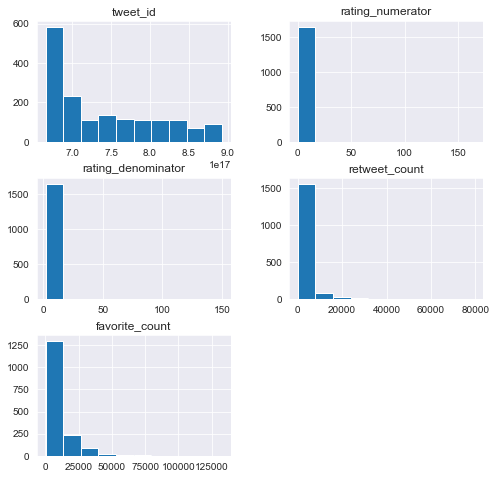

In [32]:
# Basic Visual EDA
df_master.hist(figsize = (8, 8));

In [37]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,year,month
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,7.395044e+17,11.388355,10.468788,2834.429772,9288.184274,2015.885954,7.018007
std,6.801710e+16,7.489081,6.343940,4831.960790,12641.538890,0.695041,4.098448
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,2015.000000,1.000000
25%,6.775503e+17,10.000000,10.000000,650.500000,2176.000000,2015.000000,3.000000
50%,7.141778e+17,11.000000,10.000000,1440.500000,4464.000000,2016.000000,7.000000
75%,7.931921e+17,12.000000,10.000000,3261.000000,11734.750000,2016.000000,11.000000
max,8.921774e+17,165.000000,150.000000,79515.000000,132810.000000,2017.000000,12.000000


### Question: What breed of dogs attract the most attention?

In [36]:
by_breed = df_master.groupby('breed').mean().astype(int)
top_3_liked = by_breed.favorite_count.nlargest(3)
print(top_3_liked)

breed
Saluki                24060
Bedlington_terrier    21153
French_bulldog        18416
Name: favorite_count, dtype: int32


### Question: What type of dogs attract the most attention?

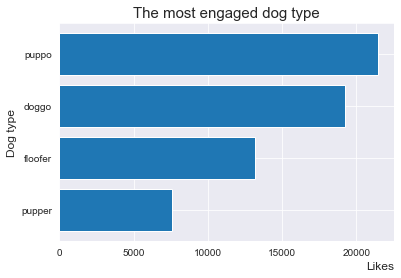

In [101]:
by_dog_type = df_master.query("dog_type != 'None'").groupby('dog_type')
by_dog_type = by_dog_type.mean().favorite_count.sort_values()

# helper function for bar plots
def plot_line_or_bar(kind, series, tick_step, title, xlabel, ylabel):
    '''
    A helper function for plotting line and bar charts
    '''
    index = np.arange(len(series) + 1)[1:]
    heights = series.values
    labels = series.index
    if kind == 'line':
        plt.plot(index, heights);
        plt.xticks(index[::tick_step], series.index[::tick_step]);
    elif kind == 'bar':
        plt.bar(index, heights);
        plt.xticks(index[::tick_step], series.index[::tick_step]);
    elif kind == 'barh':
        plt.barh(index, heights)
        plt.yticks(index[::tick_step], series.index[::tick_step]);
    
    plt.title(title, fontsize = 15);
    plt.xlabel(xlabel, fontsize = 12, loc = 'right');
    plt.ylabel(ylabel, fontsize = 12);
    
plot_line_or_bar('barh', by_dog_type, 1, 'The most engaged dog type', 'Likes', 'Dog type')

### Question: How has the organization performed overtime?

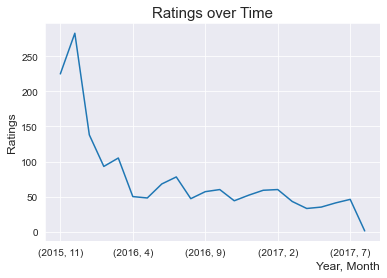

In [102]:
df_master['year'] = pd.DatetimeIndex(df_master.timestamp).year
df_master['month'] = pd.DatetimeIndex(df_master.timestamp).month
overtime = df_master.groupby(['year', 'month']).tweet_id
plot_line_or_bar('line', overtime.count(), 5, 'Ratings over Time', 'Year, Month', 'Ratings')

### Question: Are named dogs preffered to the unnamed ones?

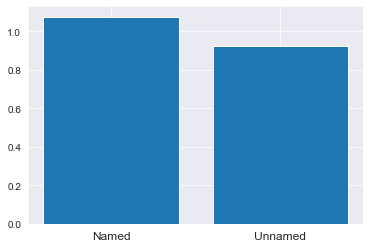

In [108]:
# Getting the average like count for each category
named = df_master.query("name != 'None'")
named_mean = named.favorite_count.mean()

unnamed = df_master.query("name == 'None'")
unnamed_mean = unnamed.favorite_count.mean()

# Creating numpy arrays to simplify the plotting process
means = np.array([named_mean, unnamed_mean])

# Proportions to help spot differences clearly   
props = means / means.mean() 
plt.bar([1, 2], props);
plt.xticks([1, 2], ['Named', 'Unnamed'], fontsize = 12);

### Insights:
1. The Saluki breed of dogs has the highest average likes, followed by Bedlington Terrier and French Bulldog.

2. The most liked kinds of dogs seem to be puppos and then doggos.

3. The amount of ratings carried out have seen a decline between 2015 and 2017.

4. Named dogs seem to be liked more than unnamed ones.